# Résolution numérique d'une équation différentielle par la méthode d'Euler

$\dfrac{\mathrm{d}v_x}{\mathrm{d}t}=-\alpha v_x\simeq\dfrac{v_x(t+h)-v_x(t)}{h}\implies v_x(t+h)\simeq v_x(t)-h\alpha v_x$ avec $\alpha =\dfrac{k}{m}$

## Solution mathématique

In [1]:
m = 1000 #kg
k = 1 #SI
v0x = 50*1000/3600 #m/s
alpha = k/m

In [2]:
import numpy as np
import matplotlib.pyplot as plt

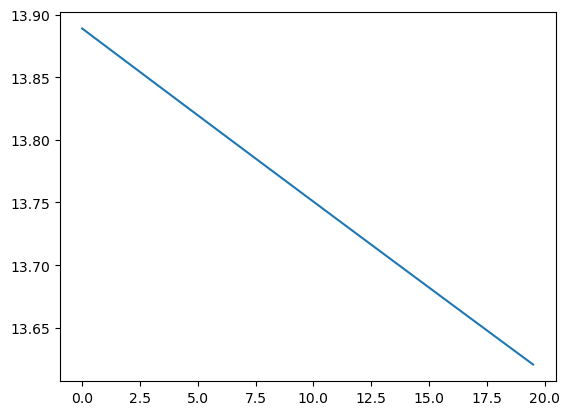

In [3]:
list_t =np.arange(0,20,0.5)
list_vx = v0x*np.exp(-alpha*list_t)
plt.plot(list_t,list_vx)

In [4]:
k = 500 #SI
alpha = k/m

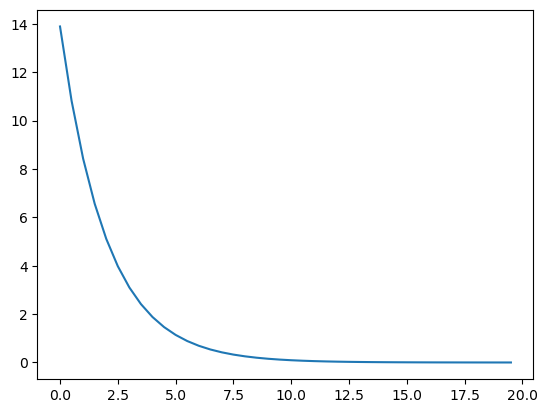

In [5]:
list_vx = v0x*np.exp(-alpha*list_t)
plt.plot(list_t,list_vx)

## Solution numérique

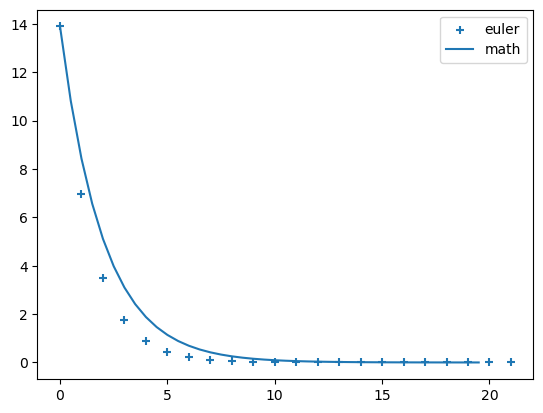

In [6]:
h = 1
t = 0
list_t_euler = [t]
vx = v0x
list_vx_euler = [vx]
while t<=20:
    vx = vx*(1-h*alpha)
    list_vx_euler.append(vx)
    t = t+h
    list_t_euler.append(t)
                        
plt.scatter(list_t_euler,list_vx_euler,marker='+',label='euler')
plt.plot(list_t,list_vx,label='math')
plt.legend()

## Influence de h

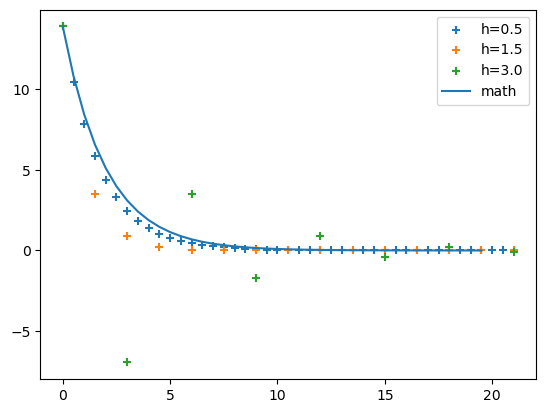

In [7]:
def euler(h):
    t = 0
    list_t_euler = [t]
    vx = v0x
    list_vx_euler = [vx]
    while t<=20:
        vx = vx*(1-h*alpha)
        list_vx_euler.append(vx)
        t = t+h
        list_t_euler.append(t)
    return list_t_euler,list_vx_euler

for h in [0.5,1.5,3]:
    X,Y = euler(h)
    plt.scatter(X,Y,marker='+',label='h=%1.1f' %h)
plt.plot(list_t,list_vx,label='math')
plt.legend()

## Complément : Euler explicite et implicite

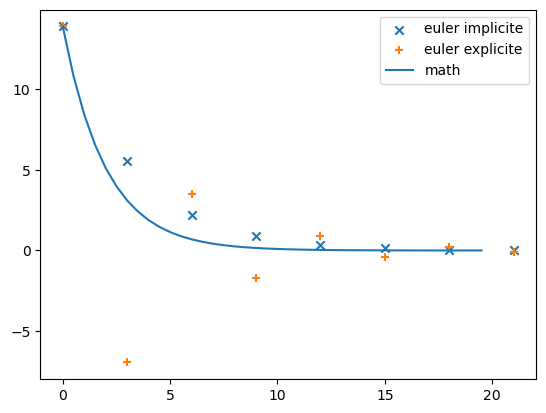

In [8]:
def euler_i(h):
    t = 0
    list_t_euler = [t]
    vx = v0x
    list_vx_euler_i = [vx]
    while t<=20:
        vx = vx/(1+h*alpha)
        list_vx_euler_i.append(vx)
        t = t+h
        list_t_euler.append(t)
    return list_t_euler,list_vx_euler_i

Xi,Yi = euler_i(3)
plt.scatter(Xi,Yi,marker='x',label='euler implicite')
X,Y = euler(3)
plt.scatter(X,Y,marker='+',label='euler explicite')
plt.plot(list_t,list_vx,label='math')
plt.legend()

## Application
$\dfrac{\mathrm{d}v_x}{\mathrm{d}t}=-\alpha v_x^p$

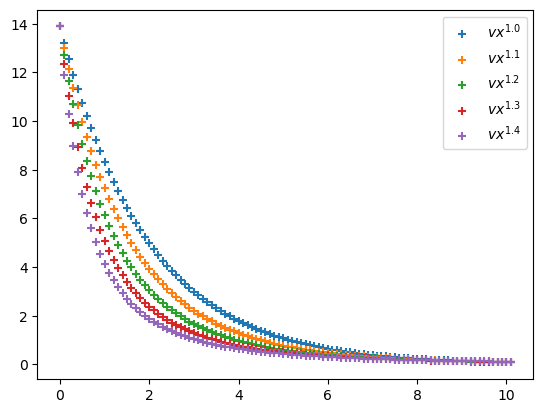

In [11]:
def appli(puissance):
    h = 0.1
    t = 0
    list_t_euler = [t]
    vx = v0x
    list_vx_euler = [vx]
    while t<=10:
        vx = vx - h*alpha*vx**puissance
        list_vx_euler.append(vx)
        t = t+h
        list_t_euler.append(t)
    return list_t_euler,list_vx_euler

for p in [1,1.1,1.2,1.3,1.4]:
    X,Y = appli(p)
    plt.scatter(X,Y,marker='+',label='$vx^{%1.1f}$' %p)
plt.legend()

Voir https://fr.wikipedia.org/wiki/Frottement_fluide